# Dealing with imbalanced classes

### Imbalanced classes are a common problem in machine learning classification. where there are a . Disproportionate ratio of observations in each class can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

### In this guide, we'll look at five possible ways to handle an imbalanced class problem using dataset created by J. A. Blackard in 1998. This dataset comprises of over half a million observations with 54 features. Each observation represents a 30-by-30-meter tract of land in wilderness areas in Colorado. The features record cartographic data about each tract: elevation, aspect, distance to water/roads/past wildfire ignition points, amount of shade at various times of day, and which of 40 soil types it contains. Our objective will be to correctly classify the minority classes, as such other important machine learning steps including, but not limited to, feature selection or hyperparameter tuning, will be neglected.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
        'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points','Rawah_Wilderness_Area',
        'Neota_Wilderness_Area','Comanche_Peak_Wilderness_Area','Cache_la_Poudre_Wilderness_Area',
        'Soil_Type_1','Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6',
        'Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10','Soil_Type_11','Soil_Type_12',
        'Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18',
        'Soil_Type_19','Soil_Type_20','Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24',
        'Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
        'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36',
        'Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40','Cover_Type']

In [4]:
df = pd.read_table('covtype.data',sep=',', names=cols)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.shape

(581012, 55)

In [6]:
x = df.drop('Cover_Type', axis=1)
y = df.Cover_Type

In [7]:
y.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

#### The value count, which we are using here to give insight into target distribution, shows that the dataset is hugely imbalanced. Such datasets have nice applications in areas like fraud detection in the banking industry or intrusion detection in networks. However, they are troublesome for some machine learning algorithms because in the end we would like to evaluate the performance of the model. There are several techniques to employ to handle imbalanced data problem and help train the classifier to detect obnormal class.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

## To ascertain both training and test datasets contain examples of each class in the same proportions as in the original dataset, we set 'stratify=y'.


#### Instantiate and fit RandomForestClassifier

In [9]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

/usr/lib64/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Make label predictions given features

In [10]:
prediction = forest.predict(X_test)

# Model evaluation

## First we look at different metrics

In [11]:
# Accuracy score:
accuracy_score(y_test, prediction)

0.9422249454400253

#### Accuracy_score measures how many of the labels the model predicted correctly out of the total. But since clasess are imbalanced, with the smallest class being ~1% the size of the biggest class, accuracy_score does not provide full details of the bigger picture.

In [12]:
# Confusion matrix
matrix = confusion_matrix(y_test, prediction)
matrix

array([[50075,  2756,     1,     0,    20,     8,   100],
       [ 2917, 67513,   157,     1,   109,   106,    22],
       [    3,   188,  8512,    33,     7,   195,     0],
       [    0,     0,    96,   575,     0,    16,     0],
       [   64,   571,    33,     0,  1699,     6,     0],
       [   14,   184,   416,    27,     4,  3697,     0],
       [  313,    24,     0,     0,     1,     0,  4790]])

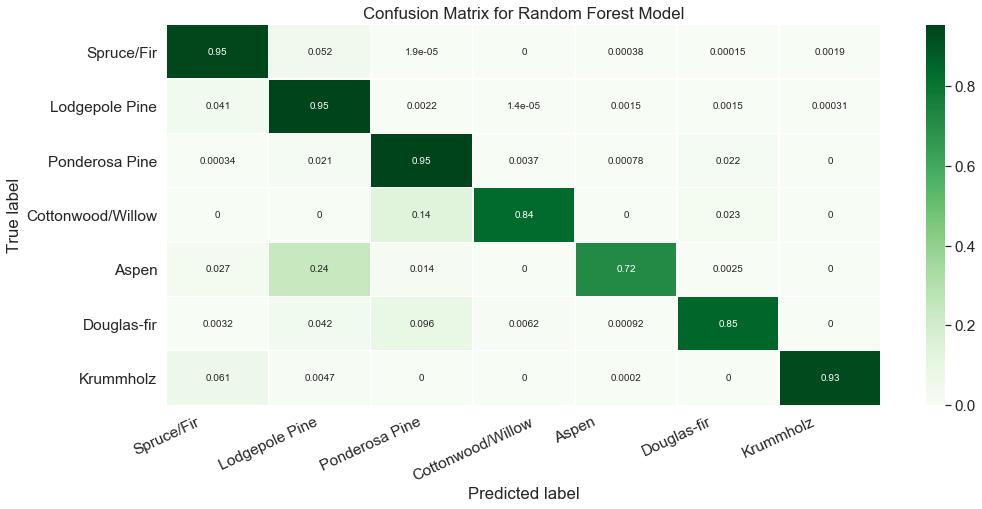

In [13]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Aspen was mislabeled 0.24 as Lodgepole Pine and confusion matrix reveals the algorithm struggled to correctly predict Aspen (72%)

In [14]:
# Classification report:
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           1       0.94      0.95      0.94     52960
           2       0.95      0.95      0.95     70825
           3       0.92      0.95      0.94      8938
           4       0.90      0.84      0.87       687
           5       0.92      0.72      0.81      2373
           6       0.92      0.85      0.88      4342
           7       0.98      0.93      0.95      5128

   micro avg       0.94      0.94      0.94    145253
   macro avg       0.93      0.88      0.91    145253
weighted avg       0.94      0.94      0.94    145253



## Test different model

In [15]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train, y_train)
predictions = logistic_regression.predict(X_test)

/usr/lib64/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
# Accuracy score:
accuracy_score(y_test, predictions)

0.7107529620730725

In [16]:
# Confusion matrix
matrix = confusion_matrix(y_test, predictions)
matrix

array([[36416, 15544,     2,     0,     0,     0,   998],
       [12630, 56963,   884,     4,     1,   226,   117],
       [   16,  1454,  6870,    18,     0,   579,     1],
       [    0,     0,   574,    88,     0,    25,     0],
       [   33,  2250,    25,     0,     3,    62,     0],
       [    1,  1630,  2362,    10,     0,   339,     0],
       [ 2495,    56,    17,     0,     0,     0,  2560]])

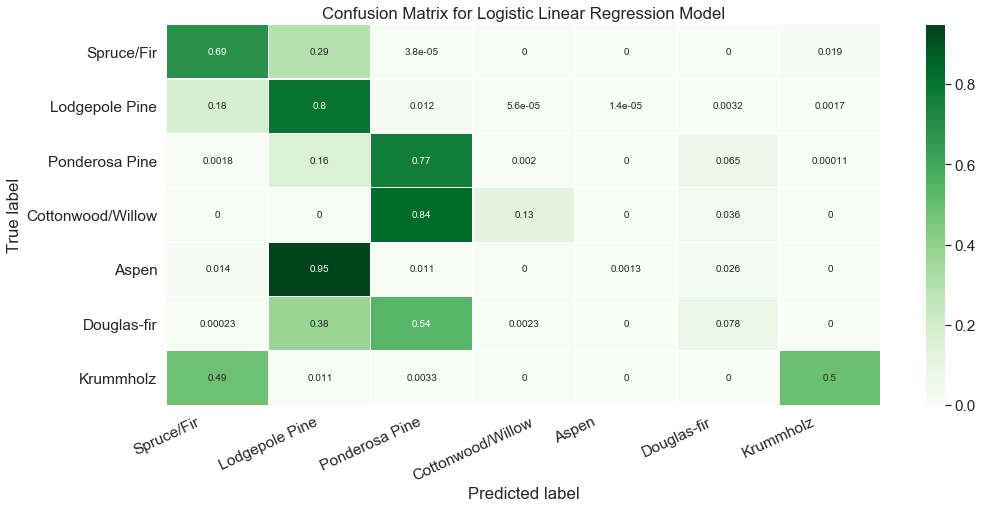

In [17]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Linear Regression Model')
plt.show()

#### Logistic regression model performs worse than random forest in this instance. Confusion matrix shows couple of labels (rare labels) the algorithm did not correctly classify.

# Use resampling techniques

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.25)

In [30]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
95831,3096,44,14,270,27,3425,222,210,119,5004,...,0,0,0,0,0,0,0,0,0,2
526980,3050,99,19,270,25,2430,247,210,84,1710,...,0,0,0,0,0,0,0,0,0,1
67626,2926,139,14,511,13,3757,241,235,120,4201,...,0,0,0,0,0,0,0,0,0,2
54382,2968,203,12,582,59,6067,214,250,170,5516,...,0,0,0,0,0,0,0,0,0,2
63127,3267,17,10,722,62,3401,212,219,144,4251,...,0,0,0,0,0,0,0,0,0,1


In [32]:
from sklearn.utils import resample

In [33]:
# separate minority and majority classes
# 1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 
# 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir',7:'Krummholz'
Spruce = X[X.Cover_Type==1]
Lodgepole = X[X.Cover_Type==2]
Ponderosa = X[X.Cover_Type==3]
Cottonwood = X[X.Cover_Type==4]
Aspen = X[X.Cover_Type==5]
Douglas = X[X.Cover_Type==6]
Krummholtz = X[X.Cover_Type==7]

# upsample minority
spruce_upsampled = resample(Spruce,
                          replace=True, # sample with replacement
                          n_samples=len(Lodgepole), # match number in majority class
                          random_state=1) # reproducible results

ponderosa_upsampled = resample(Ponderosa,
                          replace=True, # sample with replacement
                          n_samples=len(Lodgepole), # match number in majority class
                          random_state=1) # reproducible results
cottonwood_upsampled = resample(Cottonwood,
                          replace=True, # sample with replacement
                          n_samples=len(Lodgepole), # match number in majority class
                          random_state=1) # reproducible results
aspen_upsampled = resample(Aspen,
                          replace=True, # sample with replacement
                          n_samples=len(Lodgepole), # match number in majority class
                          random_state=1) # reproducible results
douglas_upsampled = resample(Douglas,
                          replace=True, # sample with replacement
                          n_samples=len(Lodgepole), # match number in majority class
                          random_state=1) # reproducible results
krummholtz_upsampled = resample(Krummholtz,
                          replace=True, # sample with replacement
                          n_samples=len(Lodgepole), # match number in majority class
                          random_state=1) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([spruce_upsampled, Lodgepole, ponderosa_upsampled, cottonwood_upsampled,
                      aspen_upsampled, douglas_upsampled, krummholtz_upsampled])

# check new class counts
upsampled.Cover_Type.value_counts()

7    212520
6    212520
5    212520
4    212520
3    212520
2    212520
1    212520
Name: Cover_Type, dtype: int64

In [34]:
y_train = upsampled.Cover_Type
X_train = upsampled.drop('Cover_Type', axis=1)

In [35]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
prediction = forest.predict(X_test)

In [36]:
# Confusion matrix
matrix = confusion_matrix(y_test, prediction)
matrix

array([[49583,  3104,     6,     0,    53,     5,   186],
       [ 2546, 67687,   196,     0,   160,   164,    28],
       [    2,   144,  8632,    33,     6,   192,     0],
       [    0,     1,    99,   571,     0,    14,     0],
       [   25,   370,    24,     0,  1924,     9,     0],
       [    4,   143,   413,    28,     5,  3775,     0],
       [  204,    25,     0,     0,     3,     0,  4889]])

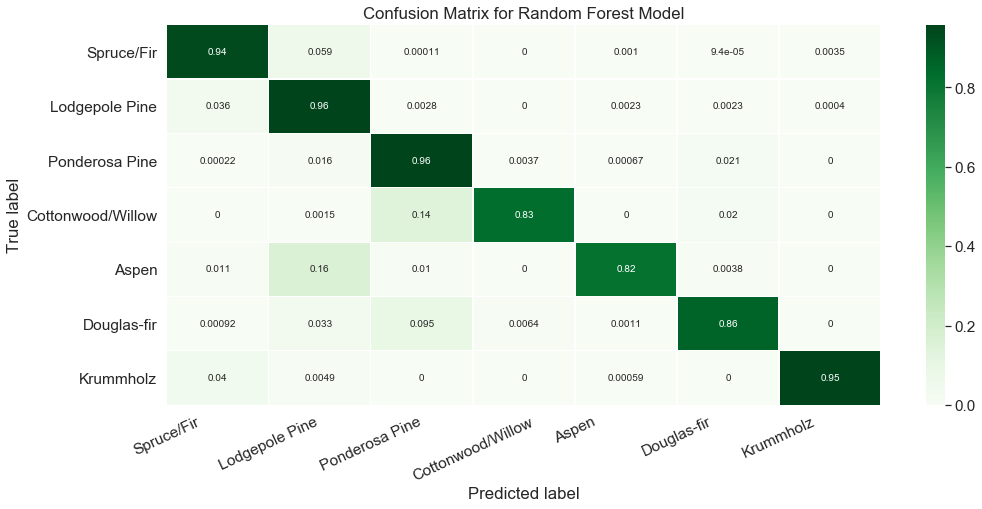

In [37]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Oversampling rare classes to balance classes result in the model performance improving. Confusion matrix shows that prediction accuracy across all classes has considerably improved.

# Concluding remarks

### In this example the purpose was to look at different ways to handle imbalanced classes because most machine learning algorithms do not work very well with imbalanced datasets. The first approach we experimented with was to test two different algorithms to see which managed to work well with imbalanced dataset and correctly classified minority classes and the experiment proved that not all machine learning algorithms are sensitive enough to minority classes. The second approach explored was to look at different evaluation metrics for improved insights into how model performed because accuracy_score is misleading in such instances. The third approach explored was to use a resampling technique and it proved to improve performance of the model in picking up minority classes. 